In [1]:
from keras.layers.convolutional import Conv2D
from keras.layers.merge import Add
from keras.layers import Input, Activation, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [2]:
K.set_image_data_format('channels_last')

In [4]:
def VDSR_origin( input_shape = (256, 256, 3) ):
    low_resolution_image = Input( shape= input_shape )

    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(low_resolution_image)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(processing)
    processing = Conv2D(1, (3, 3), padding='same', kernel_initializer='he_normal')(processing)
    Residual = processing

    high_resolution_image = Add() ([low_resolution_image, Residual])
    
    model = Model(low_resolution_image, high_resolution_image)
    return model

In [3]:
import glob
import numpy as np
import scipy
import random

In [5]:
class DataGenerator(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.LR = []
        self.HR = []

    def flow_from_directory(self, directory, batch_size, iteration):
        image_list = sorted(glob.glob(directory + '/*'))
        while True:
            random.shuffle(image_list)
            for itr in range(iteration):
                for batch_count in range(batch_size):
                    BaseImage = cv2.imread(image_list[itr*batch_size + batch_count])
                    BaseImage = cv2.resize(BaseImage,dsize=(256,256))
                    Height, Width = 256, 256
                    HighResolutionImage = BaseImage.copy()
                    ResizedBaseImage = cv2.resize(BaseImage,dsize=(int(Height/4),int( Width/4)), interpolation = cv2.INTER_CUBIC)
                    LowResolutionImage = cv2.resize(ResizedBaseImage, dsize=(Height, Width),interpolation = cv2.INTER_CUBIC)
                    
                    self.LR.append(LowResolutionImage)
                    self.HR.append(HighResolutionImage)
                
                inputs = np.asarray(self.LR, dtype=np.float32)
                targets = np.asarray(self.HR, dtype=np.float32)
                self.reset()
                yield inputs, targets

In [7]:
import argparse
import scipy
import glob
from datetime import datetime
from keras.optimizers import Adam
from keras import losses

In [8]:
parser = argparse.ArgumentParser(description='VDSR learning parameter')
parser.add_argument('--batchsize', metavar='B', default=4, type=int, 
                    help='batch size')
parser.add_argument('--epoch', metavar='E', default=50, type=int, 
                    help='number of epoch')
parser.add_argument('--train', metavar='T', type=str, 
                    help='training data directory', required=True)
parser.add_argument('--valid', metavar='V', type=str, 
                    help='valid data directory')
args = parser.parse_args(['--train','C:\\Users\\user\\Downloads\\Compressed\\sample\\train','--valid',''])

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
ImageList = glob.glob(args.train+'/*')
tmpImage = cv2.imread(ImageList[0])
DataLen = len(ImageList)
Iteration = int(DataLen / args.batchsize)

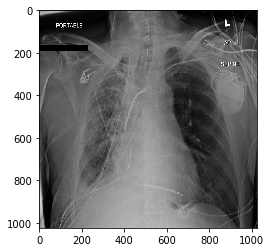

In [11]:
plt.imshow(tmpImage)
plt.show()

In [12]:
DataGen =DataGenerator()

In [13]:
if len(args.valid) > 0:
    ValidImageList = glob.glob(args.valid+'/*')
    test_flow = DataGen.flow_from_directory(directory=args.valid,
                                            batch_size=len(ValidImageList),
                                            iteration=1)
    val_lr, val_hr = test_flow.__next__()

In [14]:
test_flow=DataGen.flow_from_directory(directory=args.train,
                                            batch_size=len(ImageList),
                                            iteration=1)
X_train,Y_train=test_flow.__next__()

In [15]:
model = VDSR_origin( input_shape=(256,256,3) )

In [16]:
opt = Adam(lr=1E-3, decay=1E-3)
model.compile(loss='mse', optimizer=opt, metrics=[losses.mse])


In [17]:
model.fit(x=X_train,y=Y_train,batch_size=4,epochs=6,use_multiprocessing=True)


Epoch 1/6
350/350 [==============================] - 1415s 4s/step - loss: 593.2450 - mean_squared_error: 593.2453
Epoch 2/6
350/350 [==============================] - 1411s 4s/step - loss: 69.3479 - mean_squared_error: 69.3479
Epoch 3/6
350/350 [==============================] - 1412s 4s/step - loss: 68.3049 - mean_squared_error: 68.3049
Epoch 4/6
350/350 [==============================] - 1412s 4s/step - loss: 67.5947 - mean_squared_error: 67.5947
Epoch 5/6
350/350 [==============================] - 1415s 4s/step - loss: 67.2434 - mean_squared_error: 67.2434
Epoch 6/6
350/350 [==============================] - 1420s 4s/step - loss: 66.8004 - mean_squared_error: 66.8004


In [18]:
model.save("VDSR.h5")